# <span style="color:red">Econ-GA-4002 Final Project</span> 

### Project Title
How Does Macroeconomic Factors Affect the Collection Rate of National Pension Insurance? Evidence from Taiwan   

### Author
Jia-Yi Kung

### Summary

In our final project, I will use Python to examine and estimate the impact of four macroeconomic factors - Consumer Price Index(CPI), Economic growth rate, GDP per capita, and unemployment rate, on the collection rate of National Pension Insurance by taking time-series data from 2008 to 2021. 

The final project we organized is as follows. Section 1 mentions background information, Research Purpose, and Literature Reviews. Section 2 describes the variable definition and descriptive statistics. Section 3 outlines multiple regression models and the Bayesian estimation model. Section 4 concludes.

In [254]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import patsy
%pip install pymc3
import pymc3 as pm


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.gridspec import GridSpec

Note: you may need to restart the kernel to use updated packages.


## <span style="color:blue">Section 01. Introduction </span> 

Taiwan's National Pension Insurance aims to ensure the unemployed and economically disadvantaged individuals can enjoy their elderly life at the basic economic level. However, its collection rate had decreased remarkably over time, which even declined to 48% since 2018, mainly because the insured cannot afford the premium. Most of the citizens also called it “the punishment of being unemployed.” Therefore, in order to enhance the collection rate of National Pension Insurance, the effect of macroeconomic factors on the collection rate must be explored. 

In our final project, we will depict the problem of Taiwan's National Pension Insurance in more detail, and also introduce lately literature related to the topic. 

### Background Information

Taiwan's population is aging, and as a result, society is paying more and more attention to the life insurance provided to retirees. Other insurances in Taiwan, however, have higher insured requirements, making it impossible for residents with incomes below the average to get insured. As a result, on October 1, 2008, the government of Taiwan passed National Pension Insurance. National Pension Insurance, according to the Bureau of Labor Insurance, Ministry of Labor (2007), aims to ensure the basic economic security for citizens who are unable to be adequately covered by related social insurance when they become old, pregnant, or suffer from a mental or physical disability, as well as the stability of their survivors' lives.

Taiwanese between the ages of 25 and 65 who have not enrolled in other social insurance programs, such as labor insurance, are compelled to join the National Pension Insurance program. Every two months, they will be required to pay the pension by the Ministry of Labor. The government will provide these insurance holders with the following advantages after they turn 65: old-age pension payments, maternity payments, pension payments for mental and physical disabilities, death payments, and pension payments for surviving family members. Furthermore, because the majority of insured people are unemployed or economically disadvantaged, the government won't penalize people who miss their deadlines for paying their premiums. However, if they don't pay back the premium within ten years, they will lose their eligibility to receive benefits in the future.

The goal of National Pension Insurance is to ensure that these unemployed and economically underprivileged seniors can live out their later years at a basic standard of living. However, the majority of these citizens, who are in the greatest need of National Pension Insurance, are unable to pay the premium or repay the payment within ten years. According to the information shown in Figure 1, the insurance collection rate noticeably decreased from 77.1% in 2008 to 41.4% in 2021. Additionally, Figure 2's explanations for the nonpayment of pensions show that up to 38% of the respondents said they could not afford to make the payment. Apparently, it's worthwhile to investigate whether promoting real economic development might increase the rate at which National Pension Insurance is collected.

In [187]:
#Reading the dataset
df = pd.read_excel('/users/doriskong/Desktop/final_project_data.xlsx', sheet_name='data')
dff = pd.read_excel('/users/doriskong/Desktop/final_project_data.xlsx', sheet_name='motivation')

Text(0.5, 1.0, 'Figure 2. Reasons for not paying the pension')

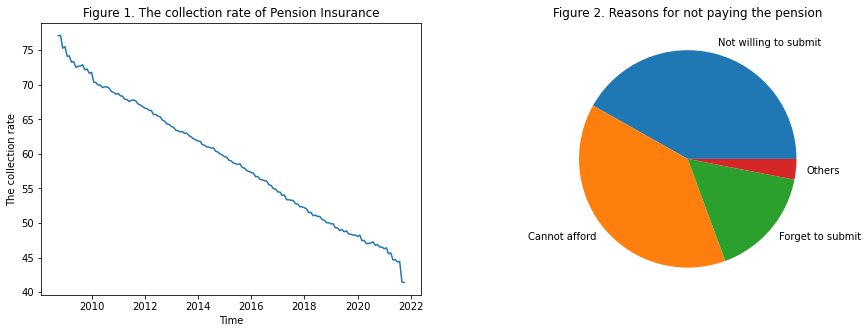

In [265]:
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.plot(dff['month'], df['collect'])
plt.title('Figure 1. The collection rate of Pension Insurance')
plt.xlabel('Time')
plt.ylabel('The collection rate')

reasons = ['Not willing to submit', 'Cannot afford', 'Forget to submit',
        'Others']
data = [41, 38, 16, 3]
ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(data, labels = reasons)
plt.title('Figure 2. Reasons for not paying the pension')

### Literature Reviews

Studies on the organization, or the comparison of National Pension Insurance in various nations, and studies on its effects can be can roughly be divided into two categories in Taiwanese research.
Hsu (2009) compared the National Pension Systems in Japan, Germany, and Taiwan for the purposes of comparisons between various nations in order to gain a thorough understanding of the function and potential difficulties of the system and to make recommendations to the government for its potential implementation in the future. Szu (2009) examined the content and issues of the five benefit payments and used many theories to describe the present disagreements on the legitimacy of the premium.

The idea of salary distribution, which Moene and Wallerstein (2001) utilized to determine the income distribution from 2008 to 2010, was also employed by Shie (2012) to assess the impact of National Pension Insurance on income redistribution. He came to the conclusion that the current National Pension Insurance does not achieve the goal of income distribution by cash transfer. This is likely because the main objective of National Pension Insurance is to ensure that the non-income population can maintain a higher standard of living when they get older, not to narrow the wealth gap. Using the social accounting matrix, Lu (1999) confirmed the impact of National Pension Insurance on macroeconomics and developed a projecting model to forecast its macroeconomic consequences. She came to the conclusion that the projection result offers a fresh viewpoint on the social cost of National Pension Insurance while being consistent with academic beliefs.
Yu (2018), on the other hand, looked at how the consumer price index (CPI), average GDP per capita, economic growth rate, unemployment rate, savings rate, and savings rate affected the amount of National Pension Insurance that was collected. He applies the fundamental statistical analysis, ADF single root verification, Granger causality test, vector self-regression model, and multiple regression model to the time-series data from 2008 to 2017. The results show a correlation between the collection rate and the unemployment rate that is positive, and a correlation between the collection rate and average GDP per capita, savings rate, and CPI that is negative.

The key contribution of this study is that we added the lagged effect and the temporal trend to further explore the impact of the CPI on the insurance collection rate. In order to offer a more complete conclusion, we also incorporate controlled variables into the discussion.


## <span style="color:blue">Section 02. Data and Sample</span> 

The time-series data for this study during the period of 2008 to 2021 are obtained from the National Statistics, R.O.C., Data, Gov, TW., and Ministry of the Interior, Department of Statistics. Additionally, the model will contain one dependent variable, four independent variables, and three controlled variables.

Table 1 provides the definitions of variables used in the regression, and we will also do the descriptive statistics for our final project, providing basic information about our dataset and highlighting the potential relationship between variables.

* Table 1. Variable Definition

<table>
  <thead>
    <tr>
      <th>Dependent variable</th>
      <th>Variable Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Collection rate of insurance (%)</td>
      <td>Monthly percentage of the number of people who paid the premium (i.e., 100% × (People who paid the premium)/(People who are supposed to pay)).</td>
    </tr>
       </tbody>
</table>
<table>
  <thead>
    <tr>
      <th>Independent variable</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Consumer price index (CPI)</td>
      <td>Monthly index based upon the index average for the year in 2016 which was set to 100, according to National Statistics, R.O.C. (2022).</td>
    </tr>
    <tr>
      <td>Economic growth rate</td>
      <td>The annual growth rate of "real gross output" or "real gross domestic product", according to National development council (2022).</td>
    </tr>
       <tr>
      <td>GDP per capita</td>
      <td>A standard measure of the value added created through the production of goods and services in a country during a certain period, according to OECD National Accounts data files (2022).</td>
    </tr>
      <tr>
      <td>Unemployment rate</td>
      <td>It represents the number of unemployed as a percentage of the labor force, according to U.S. Bureau of Labor Statistics (2022).</td>
    </tr>
  </tbody>
</table>
<table>
  <thead>
    <tr>
      <th>Controlled variables</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Year</td>
      <td>A time trend variable.(e.g., Janauary 2021 to December 2021 equals the 2021 data, etc).</td>
    </tr>
    <tr>
      <td>Year^2</td>
      <td>Square of the “Year” variable.</td>
    </tr>
       <tr>
      <td>Lagged variable of CPI</td>
      <td>Data of the N month equals the data of N-1 month in “CPI” variable. It is used to check the existence of the lagged effect.</td>
    </tr>
  </tbody>
</table>

## Data Processing

In [189]:
df.head(6)

,month,collect,cpi,ecogrow,gdp,unemploy,month2,lagcpi
0,200810,77.102092,95.98,-7.36,140439,4.37,40324656100,94.64
1,200811,77.153473,94.99,-7.36,140439,4.64,40325057721,95.98
2,200812,75.299705,93.24,-7.36,140439,5.03,40325459344,94.99
3,200901,75.522652,92.89,-7.88,134819,5.31,40361211801,93.24
4,200902,74.114919,91.47,-7.88,134819,5.75,40361613604,92.89
5,200903,74.189709,91.57,-7.88,134819,5.81,40362015409,91.47


In [190]:
df = pd.DataFrame(df)
df.describe()

,month,collect,cpi,ecogrow,gdp,unemploy,month2,lagcpi
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02,157.000000
mean,201485.503185,58.971663,98.757580,3.210637,178201.719745,4.210127,4.059655e+10,98.689236
std,379.707675,9.026327,3.429988,3.815850,25468.955127,0.641802,1.530107e+08,3.404192
min,200810.000000,41.403551,91.470000,-7.880000,134508.000000,3.620000,4.032466e+10,91.470000
25%,201201.000000,50.964142,95.980000,1.890000,155737.000000,3.770000,4.048184e+10,95.880000
50%,201504.000000,59.001956,99.020000,3.410000,181155.000000,3.990000,4.060386e+10,98.880000
75%,201807.000000,66.629144,101.710000,4.690000,194996.000000,4.310000,4.072607e+10,101.710000
max,202110.000000,77.153473,105.370000,12.020000,247077.000000,6.130000,4.084845e+10,105.060000


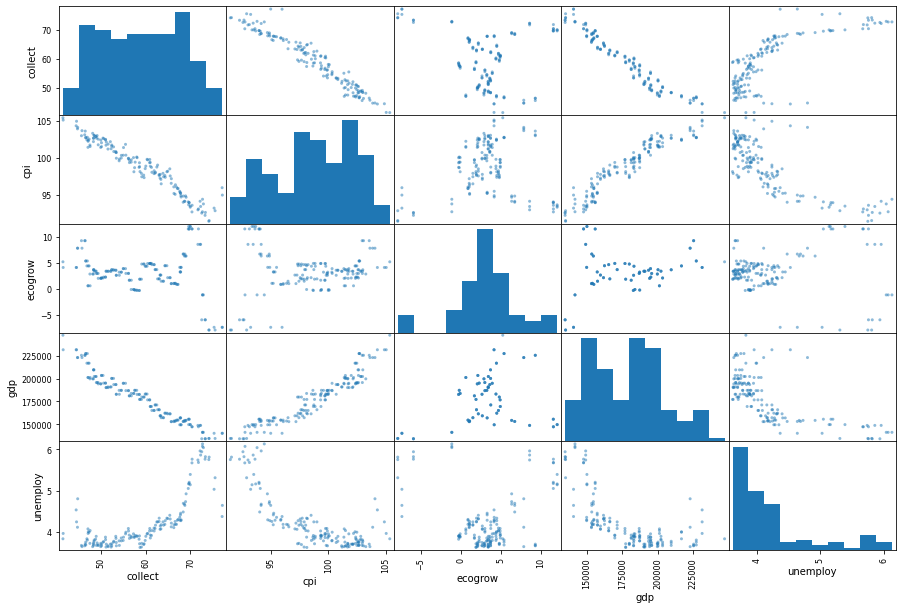

In [191]:
#Visualizing correlation
from pandas.plotting import scatter_matrix

scatter_matrix(df[['collect', 'cpi', 'ecogrow', 'gdp', 'unemploy']], figsize=(15, 10))
plt.show()

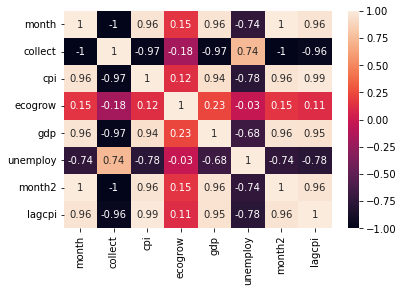

In [192]:
#Ploting correlation in heat map
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## Residual Analysis

Test for normality:
The error terms (residuals) are normally distributed, and thus satisfy the normality assumption.

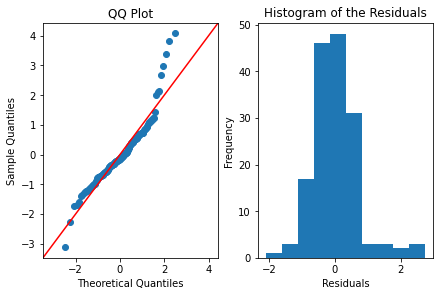

In [193]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

df_lm = ols("collect ~ cpi+ecogrow+gdp+unemploy+month2+lagcpi", data=df).fit()
residuals = df['collect'] - df_lm.predict()
sm.qqplot(residuals, line='45', fit=True, ax=ax1) 
ax1.set_title('QQ Plot')

ax2.hist(residuals)
ax2.set_title('Histogram of the Residuals')
ax2.set(xlabel = 'Residuals')
ax2.set(ylabel = 'Frequency')
plt.show()

## <span style="color:blue">Section 03. Empirical Design</span> 

## Multiple Regression model

I used the following multiple regression model to examine to what extent the decline of the collection rate of National Pension Insurance can be accounted for by macroeconomic-related changes after controlling the lagged effect, the time trend, and the year correlation.

$\hat{Pension}_{t} = \hat{\beta}_{0}+\hat{\beta}_{1}\times\text{CPI}_{t}+\hat{\beta}_{2}\times\text{Economic growth rate}_{t}+\hat{\beta}_{3}\times\text{GDP per capita}_{t}+\hat{\beta}_{4}\times\text{Unemployment rate}_{t}+\hat{\beta}_{5}\times\text{Year}+\hat{\beta}_{6}\times\text{Year}^{2}+\hat{\beta}_{7}\times\text{lag}+\text{ε}$

where the subscript $\text{t}$ represents the time trend, ${\beta}_{1},{\beta}_{2},{\beta}_{3},{\beta}_{4}$ represents vectors of coefficients to be estimated, and $\text{ε}$ is an error term, which is assumed to be normally distributed.

Secondly, through the regression result, I will test the overall hypothesis by using F-test and test the individual hypothesis by using T-test. The adjusted R-squared value will also show how well the data fit the regression model (the goodness of fit). 

### Case 1: not including the time correlation and the lagged effect

The results of the multiple regression, which ignored the time correlation and the lagged effect, are shown in the following Table. At the 5% significant level, the one-point increase in the CPI on the collection rate denotes −0.33 percentage points; a one-point increase in economic growth has a - 0.0492 percentage point impact on the collection rate; a one-point increase in the GDP has a - 3.343e-05 percentage point impact on the collection rate. Additionally, there are only CPI, economic growth and GDP have a statistically significant effect on the collection rate at the 5% significant level.

This model also shows great goodness of fit, showing adjusted R-squared is 99.4%.

In [70]:
#Setting the value for X and Y
x = df[['month', 'cpi', 'ecogrow', 'gdp', 'unemploy']]
y = df['collect']

In [71]:
#Checking independent variables
x.head()

,month,cpi,ecogrow,gdp,unemploy
0,200810,95.98,-7.36,140439,4.37
1,200811,94.99,-7.36,140439,4.64
2,200812,93.24,-7.36,140439,5.03
3,200901,92.89,-7.88,134819,5.31
4,200902,91.47,-7.88,134819,5.75


In [72]:
#Checking dependent variable
y.head()

0    77.102092
1    77.153473
2    75.299705
3    75.522652
4    74.114919
Name: collect, dtype: float64

In [73]:
#Running regression
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                collect   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5240.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.75e-167
Time:                        13:21:03   Log-Likelihood:                -162.47
No. Observations:                 157   AIC:                             336.9
Df Residuals:                     151   BIC:                             355.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3915.6710    131.206     29.844      0.000    3656.435    4174.907
month         -0.0190      0.001    -28.361      0.000      -0.020      -0.018
cpi           -0.2733      0.069     -3.976      0.000      -0.409      -0.138
ecogrow       -0.0492      0.016     -3.078      0.002      -0.081      -0.018
gdp        -3.343e-05   9.36e-06     -3.572      0.000   -5.19e-05   -1.49e-05
unemploy       0.0719      0.146      0.494      0.622      -0.216       0.360
==============================================================================
Omnibus:                       40.844   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.468
Skew:                           1.058   Prob(JB):                     2.07e-23
Kurtosis:                       6.390   Cond. No.                     6.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Case 2: Including the time correlation and the lagged effect

The results of the multiple regression, which includes the time correlation and the lagged effect, are shown in the following Table. At the 5% significant level, a one-point increase in economic growth has a - 0.0544 percentage point impact on the collection rate; a one-point increase in the GDP has a - 2.897e-05 percentage point impact on the collection rate. Additionally, there are only economic growth and GDP have a statistically significant effect on the collection rate at the 5% significant level.

This model also shows great goodness of fit, showing adjusted R-squared is 99.4%.

In [74]:
x = df[['month', 'cpi', 'ecogrow', 'gdp', 'unemploy', 'month2', 'lagcpi']]
y = df['collect']

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                collect   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4393.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.17e-166
Time:                        13:21:10   Log-Likelihood:                -161.48
No. Observations:                 157   AIC:                             337.0
Df Residuals:                     150   BIC:                             358.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.611e-07   7.45e-07      0.619      0.537   -1.01e-06    1.93e-06
month          0.0198      0.001     31.315      0.000       0.019       0.021
cpi           -0.1418      0.101     -1.399      0.164      -0.342       0.058
ecogrow       -0.0544      0.016     -3.372      0.001      -0.086      -0.023
gdp        -2.897e-05   9.63e-06     -3.009      0.003    -4.8e-05   -9.95e-06
unemploy       0.0403      0.148      0.272      0.786      -0.252       0.333
month2     -9.597e-08   3.23e-09    -29.741      0.000   -1.02e-07   -8.96e-08
lagcpi        -0.1839      0.103     -1.786      0.076      -0.387       0.020
==============================================================================
Omnibus:                       42.424   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.897
Skew:                           1.088   Prob(JB):                     5.03e-25
Kurtosis:                       6.517   Cond. No.                     1.99e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Why independent variables "CPI" and "Unemployment" are not statistically significant?

Considering both regression scenarios, which have a high R-squared value, it may indicate there is high collinearity across these two independent variables. The following figure illustrates the strong linear correlation between the unemployment rate and CPI. 

<AxesSubplot:xlabel='cpi', ylabel='unemploy'>

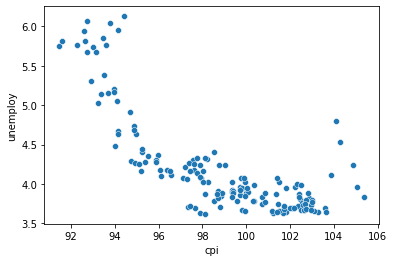

In [264]:
sns.scatterplot(x="cpi", y="unemploy", data=df)

## Bayesian estimation model

I sought to use one economic component to forecast future collection rates after testing correlations between economic factors and the Taiwan National Pension Insurance collection rate. I did not apply the Bayesian logic to CPI and GDP per capita because of the low t-value for the preceding regression. Due to its statistically significant effect on the collection rate, I opted to select just one independent variable "economic growth" from the model.

Testing whether we can predict monthly collection rate of National Pension Insurance using  𝑡−1  economic growth rate. 
Let our likelihood be described by:

$$y_{t+1} = \theta_y + \beta_g g_t + \sigma \varepsilon_{t+1}$$

with $\varepsilon_{t+1} \sim N(0, 1)$

We now specify priors over $\theta_y$, $\beta_g$, and $\sigma$:

- $\theta_y \sim N(56.26, 7.37)$
- $\beta_g \sim N(-7.8219, 26)$
- $\sigma \sim U(0.001, 10.0)$

In [256]:
m = pm.Model()

with m:
    # Observed data
    collect = pm.Data("collect", df["collect"])
    gdp = pm.Data("gdp", df["gdp"])

    # Priors
    theta_y = pm.Normal("theta_y", 56.26, 7.37)
    beta_e = pm.Normal("beta_e", -7.8219, 26)
    sigma = pm.Uniform("sigma", 0.001, 10.0)

    # Likelihood
    obs_ys = pm.Normal("obs_ys", theta_y + beta_e*eco_growth, sigma, observed=collect)

In [257]:
with m:
    trace = pm.sample(2000, tune=1500)

/Users/doriskong/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_e, theta_y]


/Users/doriskong/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/doriskong/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 22 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Text(0.5, 1.0, 'sigma')

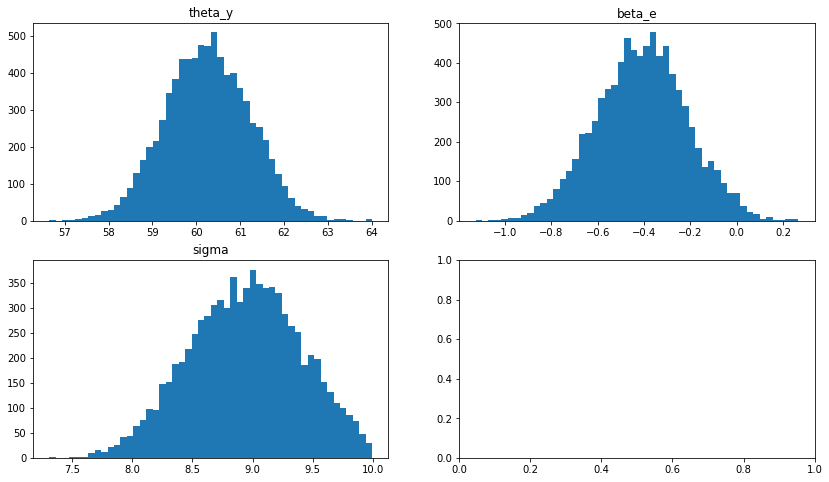

In [258]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

ax[0, 0].hist(trace["theta_y"], bins=50)
ax[0, 0].set_title("theta_y")
ax[0, 1].hist(trace["beta_e"], bins=50)
ax[0, 1].set_title("beta_e")
ax[1, 0].hist(trace["sigma"], bins=50)
ax[1, 0].set_title("sigma")

In [259]:
np.mean(trace["theta_y"]) #if ecogrow=0, mean of collection rate will be 60.25%

60.25545351156073

In [36]:
np.std(trace["theta_y"]) 

0.941532151093044

In [260]:
np.quantile(trace["theta_y"], [0.025, 0.975])  
#95 percent equal tailed credible set will go from 58.4% to 62.09%
#There are 95% possibility that the mean collection rate is between 58.4% to 62.09%

array([58.40364547, 62.09404546])

In [261]:
np.corrcoef(trace["theta_y"], trace["beta_e"])[0, 1]

-0.6395711227510935

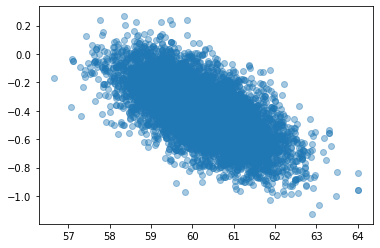

In [263]:
plt.scatter(trace["theta_y"], trace["beta_e"], alpha=0.4) 
#The economic growth rate is negatively correlated to the collection rate.

### Estimation results
After testing several models, I discovered that incorporating economic growth produced a more useful outcome. The above figure depicts the mean of the collection rate as being centered around 60%. Utilizing quantile to this distribution, I received [58.4001, 62.0924], meaning 95% of collection rate will be in this set under current economic growth rate. 

Finally, we can also conclude that even a better macroeconomic environment will still result in a decreasing collection rate of National Pension Insurance.

## <span style="color:blue">Section 04. Conclusion</span> 
Holding all other factors constant, the findings point to a negative link between economic factors and the collection rate that is statistically significant at the 5% level. The reason why they are negatively correlated may be because one of the biggest properties lies in the pension policy: Paying premium is not mandatory since this pension is aimed to design for those who are unemployed or economically disadvantaged. Hence, this will provide citizens opportunities to choose their investment products other than national pension insurance, in order to ensure they can enjoy their elderly life at the basic economic level.

With better economic development, citizens do not have to worry they may lose their job in the future, and thus do not have the demand to insure the national pension insurance. Also, there are lots of alternatives to pensions in the financial market. While the national pension is only at the bottom of Taiwan’s social security system, and it can only provide people with the most basic living security, the incentives the national pension has are limited. That is, citizens with spare income may choose to buy stocks or bonds instead of national pension insurance.

The study is limited by the absence of regional series data on the collection rate of the National Pension Insurance, which might be Taiwan's panel data. We could also examine the subject by taking into account additional intersectional elements, such as gender, age, education, and the government's budget for promoting National Pension Insurance, in addition to the macroeconomic ones.

## Reference
Bureau of Labor Insurance, Ministry of Labor. (2007, July 20). National Pension Act. Retrieved December 10, 2022, from https://www.bli.gov.tw/en/0011304.html 

Cao, Fu Nian. (2019, January 29). 103萬人的年金大限—他們為何繳不起國民年金. Retrieved December 10, 2022, from https://www.twreporter.org/a/national-pension-ten-years

Hsu, Cherry. (2009). The Comparison and Discussion on the National Pension System in Japan, Germany, and Taiwan. 逢甲大學經營管理碩士在職專班碩士論文 

Lu, Su Yu (1999). The Impact of Taiwan's National Pension insurance on Macroeconomics. 國立東華大學國際經濟研究所碩士論文
Moene. K. O. and M. Wallerstein. (2001, December). Inequality, Social Insurance and Redistribution. American Political Science Review, 95(4), 859-874. https://doi.org/10.1017/S0003055400400067 

Shie, Hong Chang. (2012). The Influence of National Pension Insurance to Income Redistribution. 嶺東科技大學財稅與會計資訊研究所碩士論文

Szu, Hui Lee. (2009). An Analysis and Review of the National Pension Policy in Taiwan, 銘傳大學法律學系碩士班碩士論文 

Yu, Tzung Yuan. (2018). The Impact of Macro-economic Variables on the Collection Rate of  National Pension Insured, 國立屏東大學國際貿易學系碩士班碩士論文